In [ ]:
pip install gdown

In [ ]:
import gdown

file_url = 'https://drive.google.com/file/d/1qRf6J-a4g7SPap0ikT1zIXwz3vPolfmA/view?usp=sharing'
output_filename = 'data.csv' # You can change the output filename here
gdown.download(file_url, output_filename, fuzzy=True)

print(f"File downloaded to: {output_filename}")

Downloading...
From: https://drive.google.com/uc?id=1qRf6J-a4g7SPap0ikT1zIXwz3vPolfmA
To: /content/data.csv
100%|██████████| 473k/473k [00:00<00:00, 26.5MB/s]

File downloaded to: data.csv


In [ ]:
import pandas as pd

data = pd.read_csv("data.csv")

In [ ]:
data

,HTML_Content,LenSubject,sub_wBank,sub_wDebit,sub_wVerify,url_wClick,url_wHere,url_wLogin,url_wUpdate,NumURL,...,NumScript,Prefix-Suffix,Web-traffic,iFrame,OnMouseOver,RightClick,BlackList,body_wDear,body_wSuspension,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9799,1,10,0,0,0,0,0,0,0,10,...,0,1,1,1,1,1,4,0,0,1
9800,1,5,0,0,0,0,0,0,0,9,...,0,0,1,1,1,1,5,0,0,1
9801,1,6,0,0,0,0,0,0,0,2,...,0,0,1,1,1,1,0,0,0,1
9802,1,3,0,0,0,0,0,0,0,2,...,0,0,1,1,1,1,1,0,0,1


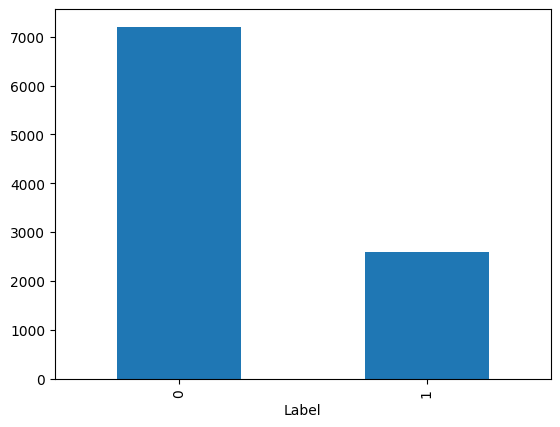

In [ ]:
data['Label'].value_counts().plot(kind='bar');

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(['Label'], axis=1)
Y = data['Label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=27)

X_train.shape, X_test.shape

((7843, 22), (1961, 22))

# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

model = LogisticRegression(solver='liblinear', random_state=27)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

cm = confusion_matrix(Y_test, Y_pred)
TN, FP, FN, TP = cm.ravel()

fpr = FP / (FP + TN)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")

Accuracy: 0.9939
Precision: 1.0000
Recall: 0.9760
F1-Score: 0.9879
False Positive Rate (FPR): 0.0000


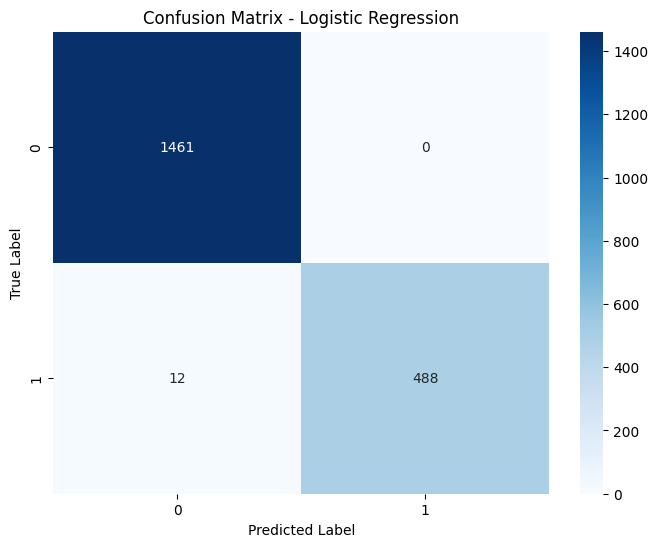

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Naive Bayes

Naive Bayes Accuracy: 0.9786
Naive Bayes Precision: 0.9370
Naive Bayes Recall: 0.9820
Naive Bayes F1-Score: 0.9590
Naive Bayes False Positive Rate (FPR): 0.0226


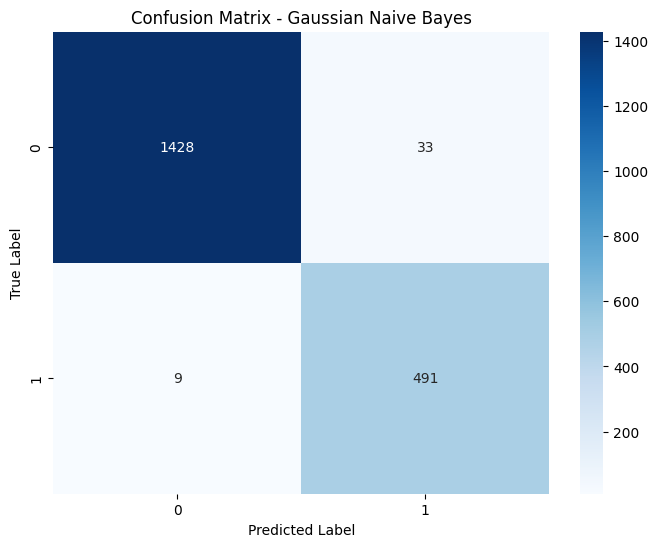

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model_nb = GaussianNB()
model_nb.fit(X_train, Y_train)

Y_pred_nb = model_nb.predict(X_test)

accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
precision_nb = precision_score(Y_test, Y_pred_nb)
recall_nb = recall_score(Y_test, Y_pred_nb)
f1_nb = f1_score(Y_test, Y_pred_nb)

cm_nb = confusion_matrix(Y_test, Y_pred_nb)
TN_nb, FP_nb, FN_nb, TP_nb = cm_nb.ravel()

fpr_nb = FP_nb / (FP_nb + TN_nb)

print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")
print(f"Naive Bayes Precision: {precision_nb:.4f}")
print(f"Naive Bayes Recall: {recall_nb:.4f}")
print(f"Naive Bayes F1-Score: {f1_nb:.4f}")
print(f"Naive Bayes False Positive Rate (FPR): {fpr_nb:.4f}")

# Visualize the Naive Bayes confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Decision Tree

Decision Tree Accuracy: 0.9929
Decision Tree Precision: 0.9959
Decision Tree Recall: 0.9760
Decision Tree F1-Score: 0.9859
Decision Tree False Positive Rate (FPR): 0.0014


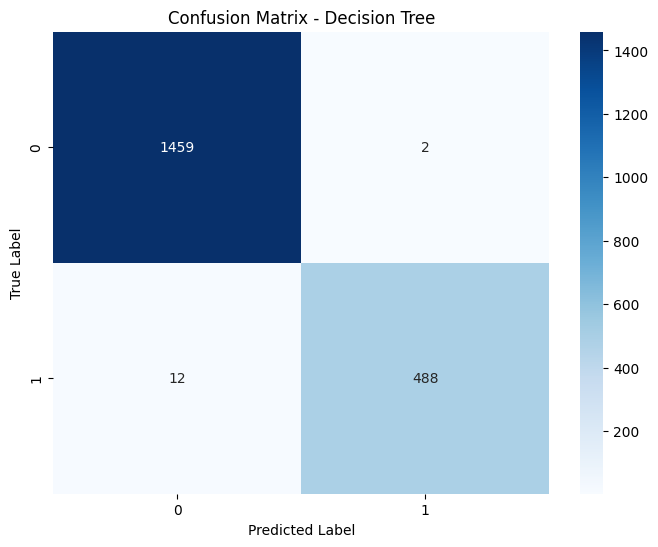

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Instantiate the Decision Tree classifier
model_dt = DecisionTreeClassifier(random_state=27)

# Train the Decision Tree model
model_dt.fit(X_train, Y_train)

# Make predictions on X_test
Y_pred_dt = model_dt.predict(X_test)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
precision_dt = precision_score(Y_test, Y_pred_dt)
recall_dt = recall_score(Y_test, Y_pred_dt)
f1_dt = f1_score(Y_test, Y_pred_dt)

# Calculate confusion matrix for Decision Tree
cm_dt = confusion_matrix(Y_test, Y_pred_dt)
TN_dt, FP_dt, FN_dt, TP_dt = cm_dt.ravel()

# Calculate False Positive Rate (FPR)
fpr_dt = FP_dt / (FP_dt + TN_dt)

# Print the calculated metrics
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree Precision: {precision_dt:.4f}")
print(f"Decision Tree Recall: {recall_dt:.4f}")
print(f"Decision Tree F1-Score: {f1_dt:.4f}")
print(f"Decision Tree False Positive Rate (FPR): {fpr_dt:.4f}")

# Visualize the Decision Tree confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Random Forest


Random Forest Accuracy: 0.9939
Random Forest Precision: 1.0000
Random Forest Recall: 0.9760
Random Forest F1-Score: 0.9879
Random Forest False Positive Rate (FPR): 0.0000


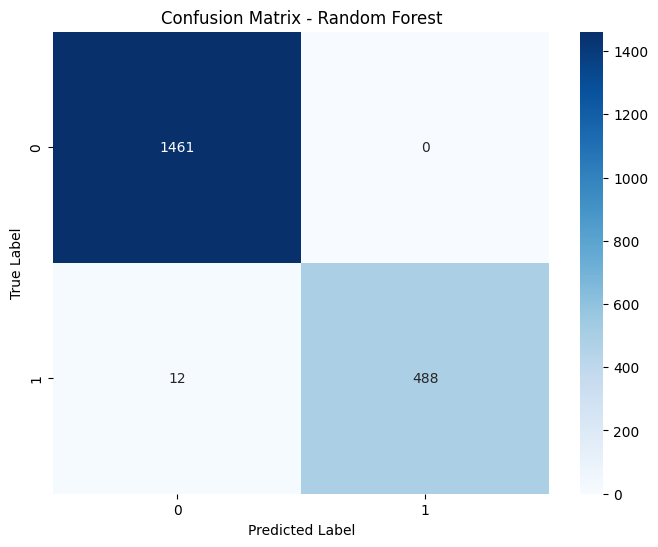

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Instantiate the Random Forest classifier
model_rf = RandomForestClassifier(random_state=27)

# Train the Random Forest model
model_rf.fit(X_train, Y_train)

# Make predictions on X_test
Y_pred_rf = model_rf.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
precision_rf = precision_score(Y_test, Y_pred_rf)
recall_rf = recall_score(Y_test, Y_pred_rf)
f1_rf = f1_score(Y_test, Y_pred_rf)

# Calculate confusion matrix for Random Forest
cm_rf = confusion_matrix(Y_test, Y_pred_rf)
TN_rf, FP_rf, FN_rf, TP_rf = cm_rf.ravel()

# Calculate False Positive Rate (FPR)
fpr_rf = FP_rf / (FP_rf + TN_rf)

# Print the calculated metrics
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1-Score: {f1_rf:.4f}")
print(f"Random Forest False Positive Rate (FPR): {fpr_rf:.4f}")

# Visualize the Random Forest confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# KNN


K-Nearest Neighbors Accuracy: 0.9796
K-Nearest Neighbors Precision: 0.9600
K-Nearest Neighbors Recall: 0.9600
K-Nearest Neighbors F1-Score: 0.9600
K-Nearest Neighbors False Positive Rate (FPR): 0.0137


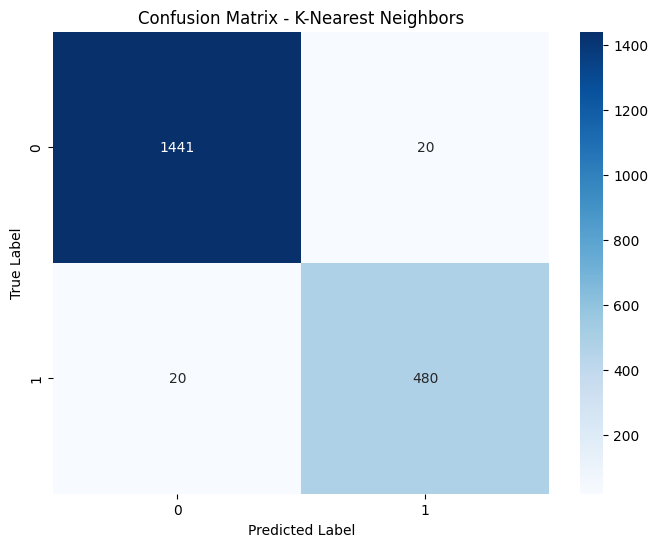

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Instantiate the K-Nearest Neighbors classifier
model_knn = KNeighborsClassifier(n_neighbors=5) # Using n_neighbors=5 as a reasonable default

# Train the KNN model
model_knn.fit(X_train, Y_train)

# Make predictions on X_test
Y_pred_knn = model_knn.predict(X_test)

# Calculate evaluation metrics
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
precision_knn = precision_score(Y_test, Y_pred_knn)
recall_knn = recall_score(Y_test, Y_pred_knn)
f1_knn = f1_score(Y_test, Y_pred_knn)

# Calculate confusion matrix for KNN
cm_knn = confusion_matrix(Y_test, Y_pred_knn)
TN_knn, FP_knn, FN_knn, TP_knn = cm_knn.ravel()

# Calculate False Positive Rate (FPR)
fpr_knn = FP_knn / (FP_knn + TN_knn)

# Print the calculated metrics
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.4f}")
print(f"K-Nearest Neighbors Precision: {precision_knn:.4f}")
print(f"K-Nearest Neighbors Recall: {recall_knn:.4f}")
print(f"K-Nearest Neighbors F1-Score: {f1_knn:.4f}")
print(f"K-Nearest Neighbors False Positive Rate (FPR): {fpr_knn:.4f}")

# Visualize the KNN confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Bảng so sánh các chỉ số của các thuật toán:


,Model,Accuracy,Precision,Recall,F1-Score,FPR
0,Logistic Regression,0.993881,1.000000,0.976,0.987854,0.000000
1,Naive Bayes,0.978582,0.937023,0.982,0.958984,0.022587
2,Decision Tree,0.992861,0.995918,0.976,0.985859,0.001369
3,Random Forest,0.993881,1.000000,0.976,0.987854,0.000000
4,KNN,0.979602,0.960000,0.960,0.960000,0.013689


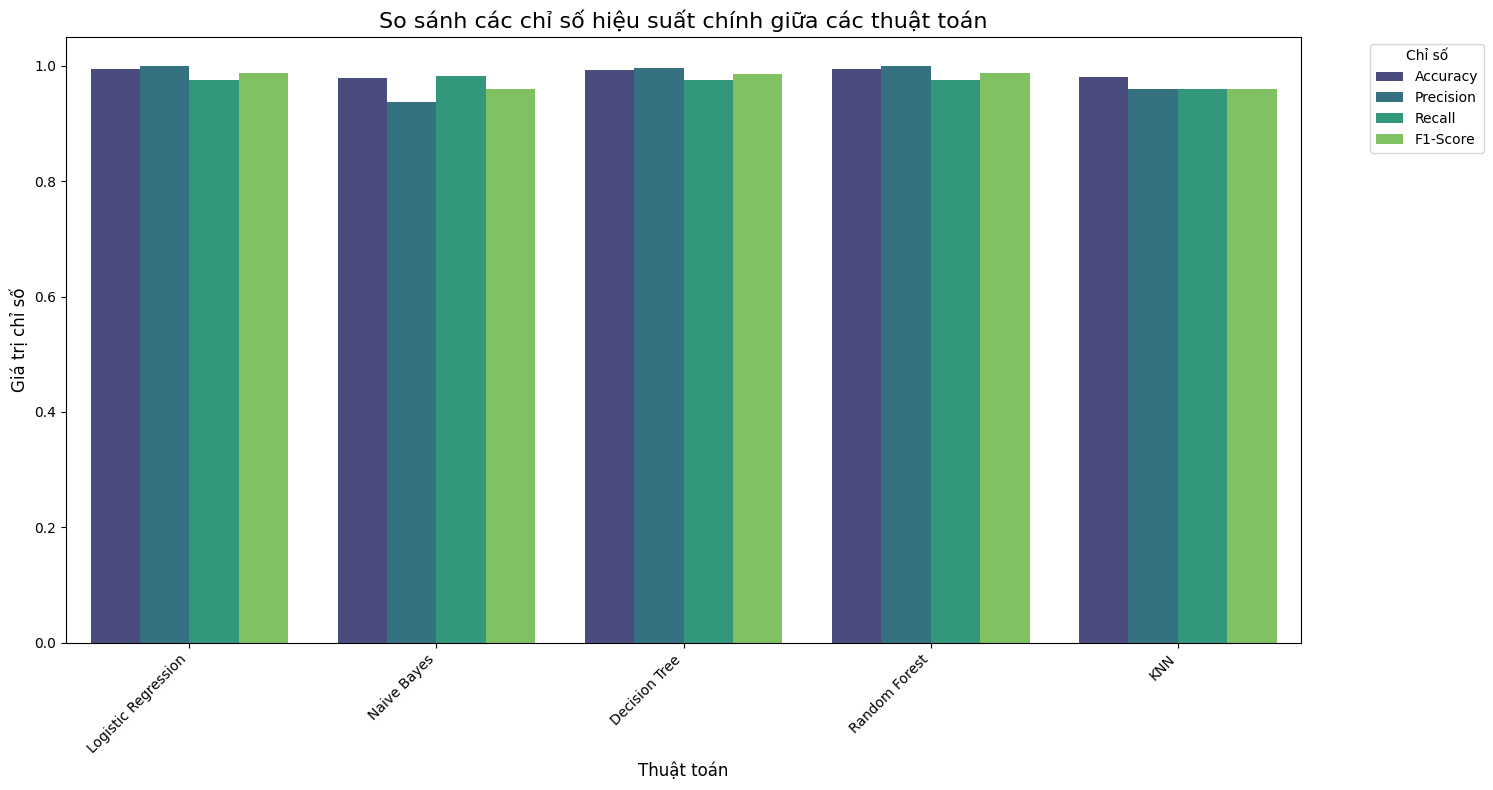

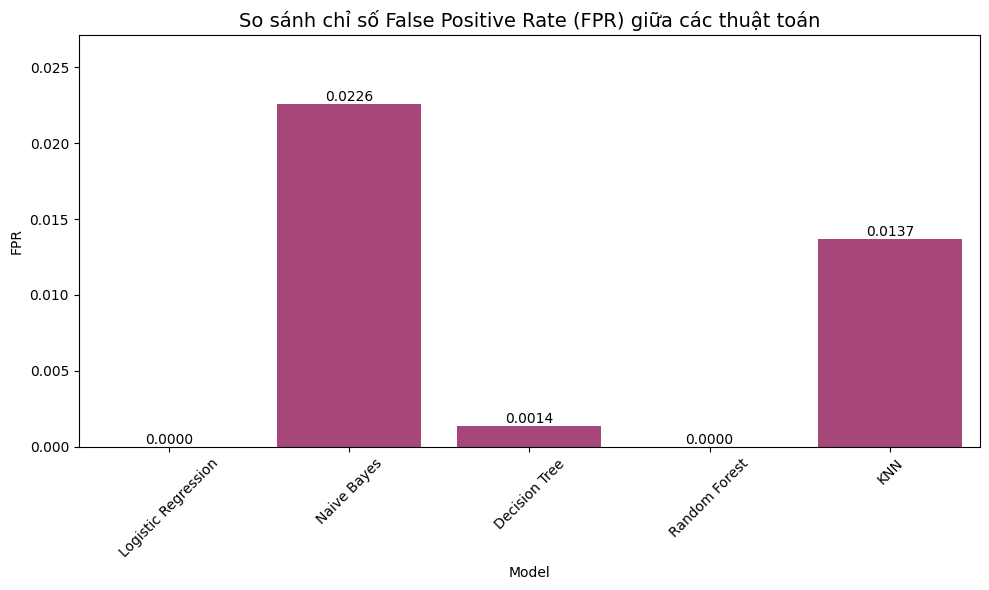

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Collect the metrics for each model
metrics_data = {
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'KNN'],
    'Accuracy': [accuracy, accuracy_nb, accuracy_dt, accuracy_rf, accuracy_knn],
    'Precision': [precision, precision_nb, precision_dt, precision_rf, precision_knn],
    'Recall': [recall, recall_nb, recall_dt, recall_rf, recall_knn],
    'F1-Score': [f1, f1_nb, f1_dt, f1_rf, f1_knn],
    'FPR': [fpr, fpr_nb, fpr_dt, fpr_rf, fpr_knn]
}

metrics_df = pd.DataFrame(metrics_data)

# Display the DataFrame
print("Bảng so sánh các chỉ số của các thuật toán:")
display(metrics_df)

# Reshape the DataFrame for grouped bar plot (for Accuracy, Precision, Recall, F1-Score)
metrics_to_plot_together = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_melted_df = metrics_df.melt(id_vars=['Model'], value_vars=metrics_to_plot_together,
                                    var_name='Metric', value_name='Value')

# Create the grouped bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Model', y='Value', hue='Metric', data=metrics_melted_df, palette='viridis')
plt.title('So sánh các chỉ số hiệu suất chính giữa các thuật toán', fontsize=16)
plt.xlabel('Thuật toán', fontsize=12)
plt.ylabel('Giá trị chỉ số', fontsize=12)
plt.ylim(0, 1.05) # Set y-limit for better comparison
plt.xticks(rotation=45, ha='right')
plt.legend(title='Chỉ số', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plotting FPR separately (as previously, it's a different type of metric)
fig2, ax2 = plt.subplots(figsize=(10, 6))
colors_fpr = sns.color_palette('magma', n_colors=1) # Single color for FPR

sns.barplot(x='Model', y='FPR', data=metrics_df, ax=ax2, color=colors_fpr[0])
ax2.set_title('So sánh chỉ số False Positive Rate (FPR) giữa các thuật toán', fontsize=14)
ax2.set_ylim(0, metrics_df['FPR'].max() * 1.2) # Adjust y-limit based on max FPR
ax2.tick_params(axis='x', rotation=45)
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.4f')

plt.tight_layout()
plt.show()

In [ ]:
# Export the metrics DataFrame to a CSV file
output_csv_filename = 'model_performance_metrics.csv'
metrics_df.to_csv(output_csv_filename, index=False)

print(f"Các chỉ số hiệu suất đã được xuất ra file '{output_csv_filename}'")


Các chỉ số hiệu suất đã được xuất ra file 'model_performance_metrics.csv'
